## Этап 1: Анализ данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [3]:
first_query = pd.read_csv('/datasets/query_1.csv')
third_query = pd.read_csv('/datasets/query_3.csv')

In [4]:
first_query.head()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [5]:
def data_quality_check (data):
    return data.info(), 'Пропуски:', data.isnull().sum(), 'Дубли:', data.duplicated().sum()


In [6]:
data_quality_check(first_query)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


(None,
 'Пропуски:',
 model             0
 flights_amount    0
 dtype: int64,
 'Дубли:',
 0)

In [7]:
third_query.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [8]:
data_quality_check(third_query)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


(None,
 'Пропуски:',
 city               0
 average_flights    0
 dtype: int64,
 'Дубли:',
 0)

In [9]:
third_query['flights_ammount'] = (third_query['average_flights'] * 31).astype('int')

### Выводы по изучению данных  
1. Данные импортированы.  
2. Типы данных корректны.  
3. Пропусков в данных нет.  

## Этап 2: Выявление основных направлений 

In [10]:
print('ТОП-10 городов по количеству рейсов')
top_10_city = third_query.sort_values('average_flights', ascending = False).head(10)
top_10_city_list = list(top_10_city['city'])
top_10_city


ТОП-10 городов по количеству рейсов


,city,average_flights,flights_ammount
43,Москва,129.774194,4022
70,Санкт-Петербург,31.161290,966
54,Новосибирск,17.322581,536
33,Красноярск,11.580645,359
20,Екатеринбург,11.322581,351
67,Ростов-на-Дону,10.193548,316
63,Пермь,10.129032,314
10,Брянск,10.000000,310
74,Сочи,9.612903,298
84,Ульяновск,9.580645,297


In [11]:
not_top_10_cities = third_query.query('city not in @top_10_city_list')

Text(0.5, 1.0, 'Количество рейсов по моделям самолётов')

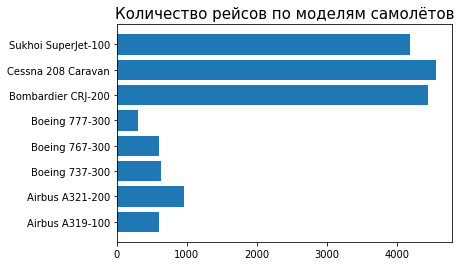

In [12]:
plt.figure()
plt.barh(first_query.model, first_query.flights_amount)
plt.title('Количество рейсов по моделям самолётов', fontdict={'size':15})

In [13]:
third_query['city'].unique()

array(['Абакан', 'Анадырь', 'Анапа', 'Архангельск', 'Астрахань',
       'Барнаул', 'Белгород', 'Белоярский', 'Благовещенск', 'Братск',
       'Брянск', 'Бугульма', 'Владивосток', 'Владикавказ', 'Волгоград',
       'Воркута', 'Воронеж', 'Геленджик', 'Горно-Алтайск', 'Грозный',
       'Екатеринбург', 'Иваново', 'Ижевск', 'Иркутск', 'Йошкар-Ола',
       'Казань', 'Калининград', 'Калуга', 'Кемерово', 'Киров', 'Когалым',
       'Комсомольск-на-Амуре', 'Краснодар', 'Красноярск', 'Курган',
       'Курск', 'Кызыл', 'Липецк', 'Магадан', 'Магнитогорск', 'Махачкала',
       'Минеральные Воды', 'Мирный', 'Москва', 'Мурманск', 'Надым',
       'Нальчик', 'Нарьян-Мар', 'Нерюнгри', 'Нефтеюганск',
       'Нижневартовск', 'Нижнекамск', 'Нижний Новгород', 'Новокузнецк',
       'Новосибирск', 'Новый Уренгой', 'Норильск', 'Ноябрьск', 'Нягань',
       'Омск', 'Оренбург', 'Орск', 'Пенза', 'Пермь', 'Петрозаводск',
       'Петропавловск-Камчатский', 'Псков', 'Ростов-на-Дону', 'Салехард',
       'Самара', 'Санк

### Выводы по моделям самолётов и количеству полётов  
Лидирующие позиции по количеству рейсов заняли модели самолётов: Sukhoi SuperJet-100, Cessna и Bombardier.  
Это объясняется следующими причинами:  
1) в выборке представлены только российские города, что говорит о вероятном преобладании в датафрейме информации о местных перевозках   внутри страны. Тогда как Boeing и Airbus чаще используется для зарубежных перелётов;  
2) модель Cessna и вовсе более предназначена для перевозки не более 14 человек, либо почтовые перевозки.  
3) Sukhoi SuperJet-100 - городость отечественной авиапромышленности. Зарубежом почти не используется.   
4) возможно, в выборке представлены данные Аэрофлота/S7/Азимут - главные эксплуатанты SSJ-100.  

In [14]:
top_10_sum = top_10_city['flights_ammount'].sum()
not_top_10_sum = not_top_10_cities['flights_ammount'].sum()
top_10_part = top_10_sum / (not_top_10_sum + top_10_sum)

print('Общее количество рейсов по городам ТОП-10:', top_10_sum)
print('Общее количество рейсов по городам ВНЕ ТОП-10:', not_top_10_sum)

print('На ТОП-10 приходится', '{:%}'.format(top_10_part), 'рейсов')

Общее количество рейсов по городам ТОП-10: 7769
Общее количество рейсов по городам ВНЕ ТОП-10: 9418
На ТОП-10 приходится 45.202770% рейсов


#### В связи с тем, что на топ-10 городов приходится практически половина всех рейсов, графики решил построить отдельно по двум группам: топ-10 и остальные города.

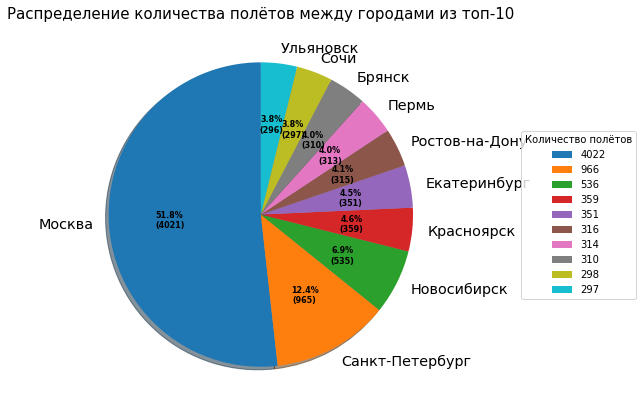

In [15]:
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
colors = ( "blue", "cyan", "brown", 
          "grey", "indigo", "beige", 'red', 'gray', 'green', 'white') 

def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d})".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(top_10_city['flights_ammount'],  
                                  autopct = lambda pct: func(pct, top_10_city['flights_ammount']), 
                                  labels = top_10_city['city'], 
                                  shadow = True, 
                                  startangle = 90, 
                                  textprops = dict(color ="black", size= 'x-large')) 
  
# Adding legend 
ax.legend(wedges, top_10_city['flights_ammount'], 
          title ="Количество полётов", 
          loc ="right", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title('Распределение количества полётов между городами из топ-10', fontdict={'size':15}) 
  
# show plot 
plt.show() 

### Выводы по городам из ТОП-10  
Ожидаемо ТОП-3 заняли города федерального значение с большим населением.  
Практически в равных пропорциях полёты распределились по городам-миллионникам.  
Мало из ТОП-10 летают на Дальний Восток и Сибирь.  

Text(0.5, 1.0, 'Количество полётов между городами без топ-10')

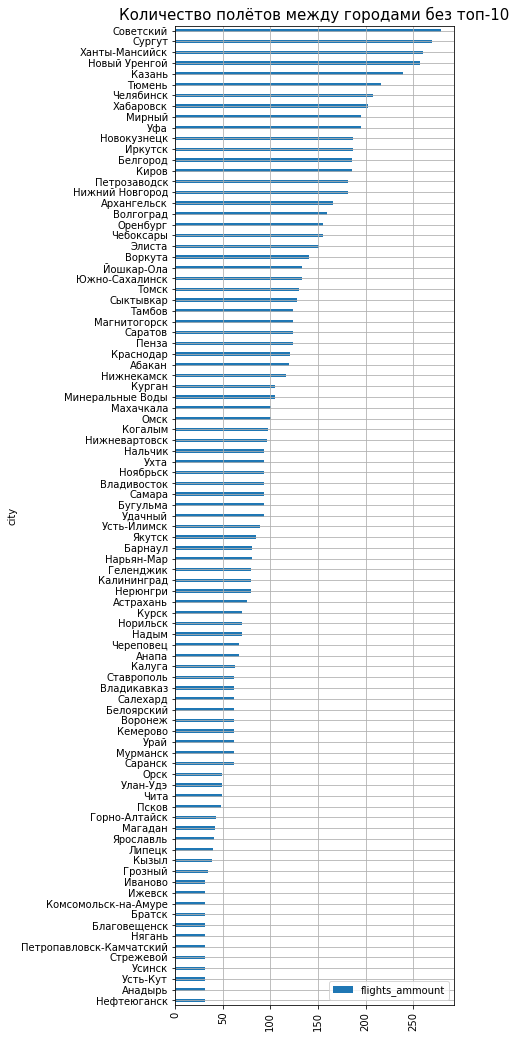

In [16]:
third_query_without_top_10 = third_query.query('city not in @top_10_city_list')


third_query_without_top_10[['city','flights_ammount']].set_index('city').sort_values(
    'flights_ammount').plot(
    kind = 'barh', figsize=(5, 18), width = .3, grid = True)
plt.xticks(rotation=90) 
plt.title('Количество полётов между городами без топ-10', fontdict={'size':15})



### Выводы по городам, не вошедшим в ТОП-10  
Взаимосвязь между количеством населения и удалённостью от Москвы играет свою роль -  
Мало летают в города с маленьким населением, а также туда, где не ведны кремлёвские звёзды.  

## Этап 3: Проверка гипотезы

In [17]:
last_query = pd.read_csv('/datasets/query_last.csv')

In [18]:
last_query

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [19]:
data_quality_check(last_query)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


(None,
 'Пропуски:',
 week_number      0
 ticket_amount    0
 festival_week    7
 festival_name    7
 dtype: int64,
 'Дубли:',
 0)

In [20]:
festival_data = last_query.query('festival_week != "NaN"').drop('festival_week', axis = 1)
not_festioval_data = last_query.query('festival_week == "NaN"').drop(['festival_week', 'festival_name'], axis = 1)

### Проверка гипотезы:   
«Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Формулировка нулевой гипотезы: "среднее количество проданных билетов в фестивальные недели равно среднему количеству проданных   билетов в недели без фестивалей" (средние двух генеральных совокупностей равны между собой).  
  
Альтернативная гипотеза в данном случае является двухсторонней и звучит так: "Среднее количество проданных билетов в фестивальные недели не равно среднему количеству проданных билетов в недели без фестивалей".  
  
Для проверки гипотезы был проведён t-тест Стъюдента с пороговым p-value равном 5%.  

In [21]:
from scipy import stats as st
festival = festival_data['ticket_amount']
not_festival = not_festioval_data['ticket_amount']

alpha = .05

results = st.ttest_ind(
    festival, 
    not_festival)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.09688869045922928
Не получилось отвергнуть нулевую гипотезу


In [24]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(festival, not_festival, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))

if (p < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Statistics=2.000, p=0.068
Не получилось отвергнуть нулевую гипотезу


### Выводы.  
Отвергнуть нулевую гипотезу не получилось.  
Нет оснований утверждать, что спрос на билеты выше в фестивальные недели.  
Тем не менее, для более корректного анализа было бы правильно сократить анализируемые периоды, где это возможно. Фестиваль может длиться 2-3 дня и именно в эти дни может отмечаться скачок спроса на билеты.  
Можно предположить, что анализируемые фестивали не являются массовыми или сверхпопулярными. Даже сама вместимость фестивалей можно быть ограничена, что необходимо учесть.  